In [2]:
#%matplotlib widget

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Adding library directory to python search path
import os
import sys
import git

repo = git.Repo('.', search_parent_directories=True)
library_dir = repo.working_tree_dir + '/lib'
sys.path.insert(0, library_dir)

import miptlib as mipt

$$ a = (2.87 \pm 0.02) \cdot 10^{-3} \; \frac{ \text{МэВ} }{ \text{кан.} }$$
$$ b = (-0.04 \pm 0.04) \; \text{МэВ}$$


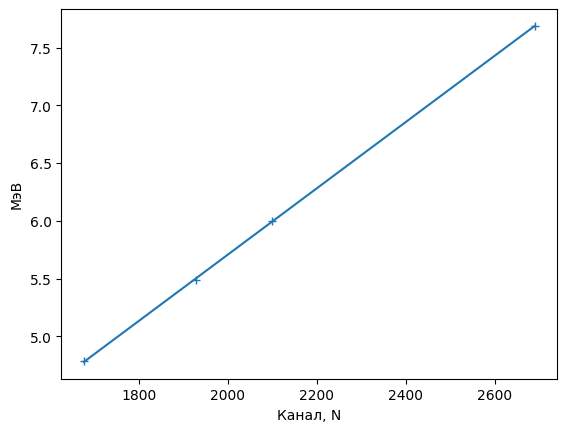

In [4]:
N = np.array([1677.0, 1930., 2100., 2690.])
E = np.array([4.784, 5.490, 6.002, 7.687])

mipt.plot(N, E, unique_marker='+')
plt.xlabel("Канал, N")
plt.ylabel("МэВ")

mnk_tab = mipt.mnk(N, E).data

A = mnk_tab['a'][0]
B = mnk_tab['b'][0]
dA = mnk_tab['da'][0]
dB = mnk_tab['db'][0]

print('$$ a = ({:.2f} \\pm {:.2f}) \\cdot 10^{{-3}} \\; \\frac{{ \\text{{МэВ}} }}{{ \\text{{кан.}} }}$$'
      .format(A * 1000, dA * 1000))

print('$$ b = ({:.2f} \\pm {:.2f}) \\; \\text{{МэВ}}$$'
      .format(B, dB))

In [5]:
Ra = mipt.read_excel('../data/Ra.xlsx', usecols=[0,1], header=[5])
Ra

,Channel,Counts
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4091,4092,0
4092,4093,0
4093,4094,0
4094,4095,0


Text(0, 0.5, 'Число')

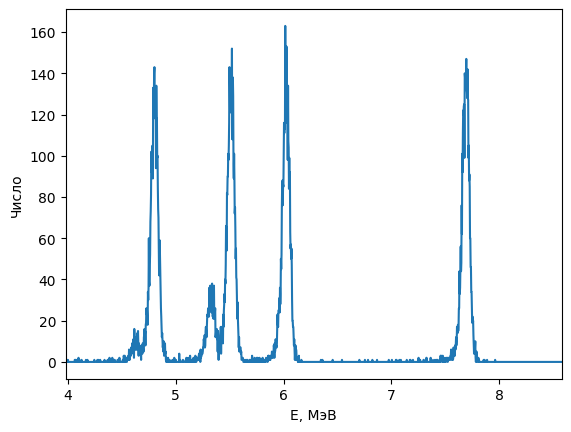

In [6]:
channels = Ra['Channel'] * A + B
counts = Ra['Counts']

mipt.plot(channels, counts, func=None, unique_marker='-')
plt.xlim(1400*A + B, 3000*A + B)
plt.xlabel("E, МэВ")
plt.ylabel("Число")

In [7]:
Pu = mipt.read_excel('../data/Pu.xlsx', usecols=[0])
Pu

,0
0,0
1,0
2,0
3,0
4,0
...,...
4091,0
4092,0
4093,0
4094,0


Text(0, 0.5, 'Число')

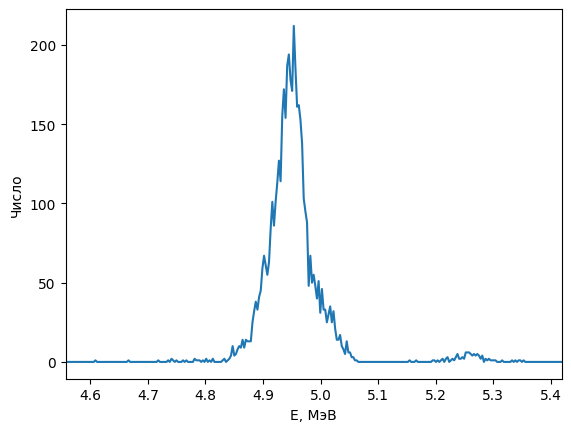

In [15]:
channels = np.arange(0, len(Pu[0])) * A + B
counts = Pu[0]

mipt.plot(channels, counts, func=None, unique_marker='-')
plt.xlim(1600 * A + B, 1900 * A + B)
plt.xlabel("E, МэВ")
plt.ylabel("Число")

In [27]:
AmTh = mipt.read_excel('../data/AmTh.xlsx', usecols=[0,1], header=[5])
AmTh

,Channel,Counts
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,0
4,5.0,0
...,...,...
2620,2621.0,0
2621,2622.0,0
2622,2623.0,0
2623,2624.0,0


Text(0, 0.5, 'Число')

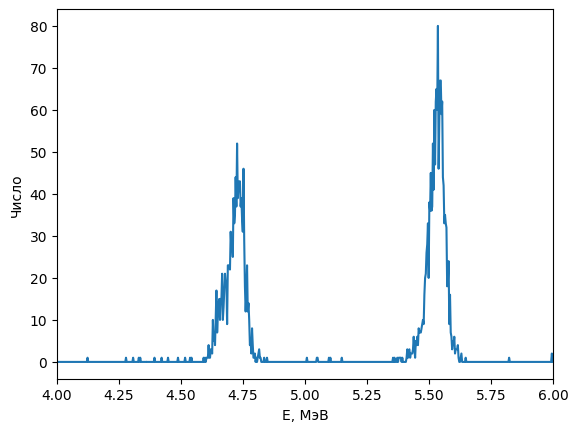

In [32]:
channels = AmTh['Channel'] * A + B
counts = AmTh['Counts']

mipt.plot(channels, counts, func=None, unique_marker='-')
plt.xlim(4, 6)
plt.xlabel("E, МэВ")
plt.ylabel("Число")

In [19]:
U = mipt.read_excel('../data/U.xlsx', usecols=[0])
U

,0
0,0
1,0
2,0
3,0
4,0
...,...
4091,0
4092,0
4093,0
4094,0


Text(0, 0.5, 'Число')

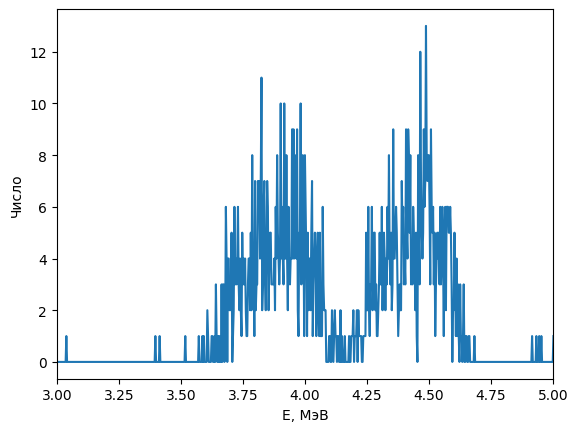

In [23]:
channels = np.arange(0, len(U[0])) * A + B
counts = U[0]

mipt.plot(channels, counts, func=None, unique_marker='-')
plt.xlim(3, 5)
plt.xlabel("E, МэВ")
plt.ylabel("Число")

In [38]:
Res = mipt.read_excel('../data/res.ods', usecols=[0, 1, 2, 3, 4, 5, 6], header=[0])
Res

,Образец,N_i,ΔN_i,E_i,ΔE_i,R_i,"R_фл, 10^-4"
0,226_Ra,1599.655,30.477,4.780,0.094,0.019,8.71
1,226_Ra,1835.979,26.313,5.507,0.081,0.014,8.14
2,226_Ra,2007.928,23.358,6.029,0.072,0.012,7.78
3,226_Ra,2549.704,24.655,7.695,0.076,0.010,6.88
4,239_Pu,1746.006,18.144,5.222,0.057,0.010,8.34
5,239_Pu,1853.483,12.410,5.550,0.039,0.007,8.09
6,241_Am+230_Th,1589.013,18.051,4.738,0.056,0.011,8.75
7,241_Am+230_Th,1849.311,18.709,5.541,0.058,0.010,8.11
8,238_U,1392.252,49.932,4.146,0.154,0.036,9.36
9,238_U,1572.091,69.302,4.693,0.213,0.044,8.80


Text(0, 0.5, '$ln(T_{1/2})$')

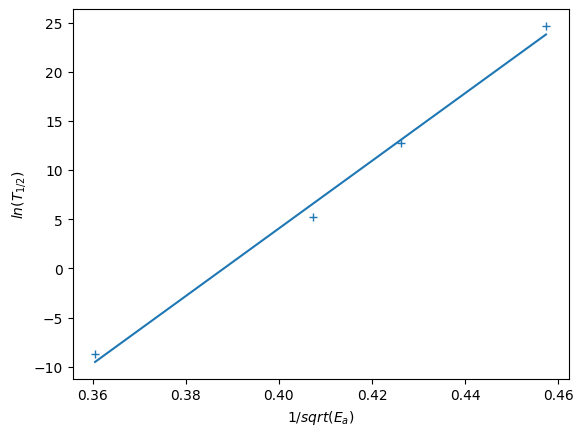

In [49]:
E_a = np.array([4.780, 5.507, 6.029, 7.695])
E_a = 1 / np.sqrt(E_a)
T = np.array([1620*365*24*60*60, 3.82*24*60*60, 3.11*60, 1.63*10**(-4)])
log_T = np.log(T)

mipt.plot(E_a, log_T, unique_marker='+')
plt.xlabel("$1/sqrt(E_a)$")
plt.ylabel("$ln(T_{1/2})$")